In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from PIL import Image

In [2]:
# Path to the dataset directory
dataset_dir = 'CUB_200_2011/'

In [3]:
# Load class names from classes.txt file
class_names_df = pd.read_csv(os.path.join(dataset_dir, 'classes.txt'), sep=' ', header=None, names=['class_id', 'class_name'])
class_names_df['class_id'] = class_names_df['class_id'].astype(str)

In [4]:
print(class_names_df.head())

  class_id                  class_name
0        1  001.Black_footed_Albatross
1        2        002.Laysan_Albatross
2        3         003.Sooty_Albatross
3        4       004.Groove_billed_Ani
4        5          005.Crested_Auklet


In [5]:
# Load image filenames and class labels from image_class_labels.txt
image_class_labels = pd.read_csv(os.path.join(dataset_dir, 'image_class_labels.txt'), sep=' ', header=None, names=['image_id', 'class_id'])
image_class_labels['class_id'] = image_class_labels['class_id'].astype(str)

In [6]:
print(image_class_labels.head())

   image_id class_id
0         1        1
1         2        1
2         3        1
3         4        1
4         5        1


In [7]:
# Load image filenames from images.txt file
images_df = pd.read_csv(os.path.join(dataset_dir, 'images.txt'), sep=' ', header=None, names=['image_id', 'filename'])

In [8]:
print(images_df.head())

   image_id                                           filename
0         1  001.Black_footed_Albatross/Black_Footed_Albatr...
1         2  001.Black_footed_Albatross/Black_Footed_Albatr...
2         3  001.Black_footed_Albatross/Black_Footed_Albatr...
3         4  001.Black_footed_Albatross/Black_Footed_Albatr...
4         5  001.Black_footed_Albatross/Black_Footed_Albatr...


In [9]:
# Merge image filenames with class labels
image_data = pd.merge(images_df, image_class_labels, on='image_id')
print(image_data.head())

   image_id                                           filename class_id
0         1  001.Black_footed_Albatross/Black_Footed_Albatr...        1
1         2  001.Black_footed_Albatross/Black_Footed_Albatr...        1
2         3  001.Black_footed_Albatross/Black_Footed_Albatr...        1
3         4  001.Black_footed_Albatross/Black_Footed_Albatr...        1
4         5  001.Black_footed_Albatross/Black_Footed_Albatr...        1


In [10]:
# Merge with class names to get class names for each image
image_data = pd.merge(image_data, class_names_df, on='class_id')
print(image_data.head())

   image_id                                           filename class_id  \
0         1  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
1         2  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
2         3  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
3         4  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
4         5  001.Black_footed_Albatross/Black_Footed_Albatr...        1   

                   class_name  
0  001.Black_footed_Albatross  
1  001.Black_footed_Albatross  
2  001.Black_footed_Albatross  
3  001.Black_footed_Albatross  
4  001.Black_footed_Albatross  


In [11]:
import pandas as pd

# Read the bounding boxes data
bounding_boxes_df = pd.read_csv(os.path.join(dataset_dir, 'bounding_boxes.txt'), sep=' ', header=None, names=['image_id', 'x', 'y', 'width', 'height'])

# Merge image_data with bounding_boxes_df on image_id
image_data = pd.merge(image_data, bounding_boxes_df, on='image_id')

In [12]:
print(image_data.head())

   image_id                                           filename class_id  \
0         1  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
1         2  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
2         3  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
3         4  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
4         5  001.Black_footed_Albatross/Black_Footed_Albatr...        1   

                   class_name      x      y  width  height  
0  001.Black_footed_Albatross   60.0   27.0  325.0   304.0  
1  001.Black_footed_Albatross  139.0   30.0  153.0   264.0  
2  001.Black_footed_Albatross   14.0  112.0  388.0   186.0  
3  001.Black_footed_Albatross  112.0   90.0  255.0   242.0  
4  001.Black_footed_Albatross   70.0   50.0  134.0   303.0  


In [13]:
# Load image filenames from images.txt file
train_test_split_data = pd.read_csv(os.path.join(dataset_dir, 'train_test_split.txt'), sep=' ', header=None, names=['image_id', 'train_test_label'])

# Add the train_test_split data as a new column in the image_data DataFrame
image_data = pd.merge(image_data, train_test_split_data, on='image_id')
print(image_data.head())

   image_id                                           filename class_id  \
0         1  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
1         2  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
2         3  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
3         4  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
4         5  001.Black_footed_Albatross/Black_Footed_Albatr...        1   

                   class_name      x      y  width  height  train_test_label  
0  001.Black_footed_Albatross   60.0   27.0  325.0   304.0                 0  
1  001.Black_footed_Albatross  139.0   30.0  153.0   264.0                 1  
2  001.Black_footed_Albatross   14.0  112.0  388.0   186.0                 0  
3  001.Black_footed_Albatross  112.0   90.0  255.0   242.0                 1  
4  001.Black_footed_Albatross   70.0   50.0  134.0   303.0                 1  


In [14]:
# Perform the train-test split
train_data = image_data[image_data['train_test_label'] == 1]

test_data = image_data[image_data['train_test_label'] == 0]

In [15]:
# Split data into training and test sets
validation_data, test_data = train_test_split(test_data, test_size=0.2, random_state=42)

In [16]:
train_data.head()


image_id                                           filename class_id  \
1         2  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
3         4  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
4         5  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
6         7  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
7         8  001.Black_footed_Albatross/Black_Footed_Albatr...        1   

                   class_name      x     y  width  height  train_test_label  
1  001.Black_footed_Albatross  139.0  30.0  153.0   264.0                 1  
3  001.Black_footed_Albatross  112.0  90.0  255.0   242.0                 1  
4  001.Black_footed_Albatross   70.0  50.0  134.0   303.0                 1  
6  001.Black_footed_Albatross    7.0  75.0  420.0   262.0                 1  
7  001.Black_footed_Albatross   78.0  86.0  333.0   158.0                 1

In [17]:
validation_data.head()

image_id                                           filename class_id  \
1782       1783  032.Mangrove_Cuckoo/Mangrove_Cuckoo_0023_26409...       32   
10162     10163  173.Orange_crowned_Warbler/Orange_Crowned_Warb...      173   
837         838  016.Painted_Bunting/Painted_Bunting_0102_16642...       16   
8951       8952  153.Philadelphia_Vireo/Philadelphia_Vireo_0083...      153   
10176     10177  173.Orange_crowned_Warbler/Orange_Crowned_Warb...      173   

                       class_name      x      y  width  height  \
1782          032.Mangrove_Cuckoo   19.0   91.0  433.0   294.0   
10162  173.Orange_crowned_Warbler  106.0  166.0  166.0   223.0   
837           016.Painted_Bunting   28.0   72.0  339.0   208.0   
8951       153.Philadelphia_Vireo  143.0  149.0  235.0   188.0   
10176  173.Orange_crowned_Warbler  226.0  126.0  101.0   127.0   

       train_test_label  
1782                  0  
10162                 0  
837                   0  
8951                  0  
10176                 0

In [18]:
test_data.head()

image_id                                           filename class_id  \
10063     10064  171.Myrtle_Warbler/Myrtle_Warbler_0074_166637.jpg      171   
5970       5971  102.Western_Wood_Pewee/Western_Wood_Pewee_0056...      102   
2182       2183  039.Least_Flycatcher/Least_Flycatcher_0015_302...       39   
10951     10952    186.Cedar_Waxwing/Cedar_Waxwing_0100_178643.jpg      186   
355         356  007.Parakeet_Auklet/Parakeet_Auklet_0013_79597...        7   

                   class_name      x      y  width  height  train_test_label  
10063      171.Myrtle_Warbler  268.0  130.0  124.0   120.0                 0  
5970   102.Western_Wood_Pewee  137.0   43.0  143.0   280.0                 0  
2182     039.Least_Flycatcher   62.0   67.0  259.0   382.0                 0  
10951       186.Cedar_Waxwing    9.0   13.0  369.0   272.0                 0  
355       007.Parakeet_Auklet   33.0   72.0  362.0   239.0                 0

In [19]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from tqdm import tqdm

# Function to process images
def process_images(data):
    # Loop over all images in the data
    for i in tqdm(range(len(data))):
        # Get the filename and label
        filename = data.iloc[i,1]  # Assuming that the filename is the first element
        label = data.iloc[i, 2]  # Assuming that the label is the second element
        label_class = np.argmax(label)

        # Extract the folder name from the filename
        folder = filename.split('/')[0]

        # Create the directory for cropped images if it doesn't exist
        if not os.path.exists(f'CUB_200_2011/cropped_images/{folder}'):
            os.makedirs(f'CUB_200_2011/cropped_images/{folder}')

        # Load the image from the file
        image_path = 'CUB_200_2011/Images/' + filename
        image = Image.open(image_path)  # Keep the image as a PIL Image object for cropping

        # Get the corresponding row from image_data
        row = data.iloc[i]

        # Calculate bounding box coordinates
        xmin = int(row['x'])
        ymin = int(row['y'])
        xmax = int(xmin + row['width'])
        ymax = int(ymin + row['height'])

        # Crop the image to the bounding box
        cropped_image = image.crop((xmin, ymin, xmax, ymax))

        # Save the cropped image to the new directory
        cropped_image_path = f'CUB_200_2011/cropped_images/' + filename
        cropped_image.save(cropped_image_path)

        # If the current index is a multiple of 1000, display the images
        if i % 1000 == 0:
            # Convert the original image to a NumPy array for drawing the bounding box
            image_array = np.array(image)

            # Draw the bounding box on the image
            image_bgr = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)
            cv2.rectangle(image_bgr, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
            image_with_box = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

            # Create two subplots: one for the original image with bounding box, one for the cropped image
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(image_with_box)
            plt.title('Original Image with Bounding Box')
            plt.subplot(1, 2, 2)
            plt.imshow(cropped_image)
            plt.title('Cropped Image')
            plt.show()

  0%|          | 0/5994 [00:00<?, ?it/s]

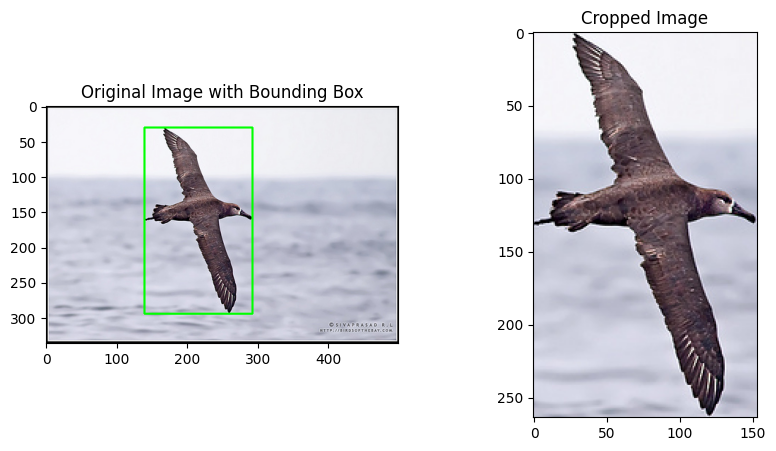

 16%|█▌        | 965/5994 [00:02<00:10, 482.95it/s]

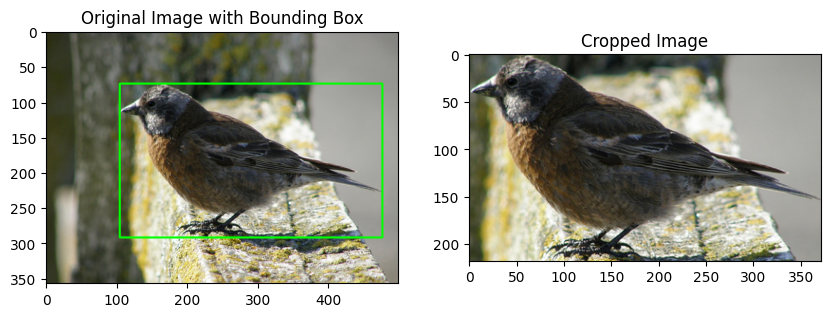

 33%|███▎      | 1967/5994 [00:04<00:07, 513.56it/s]

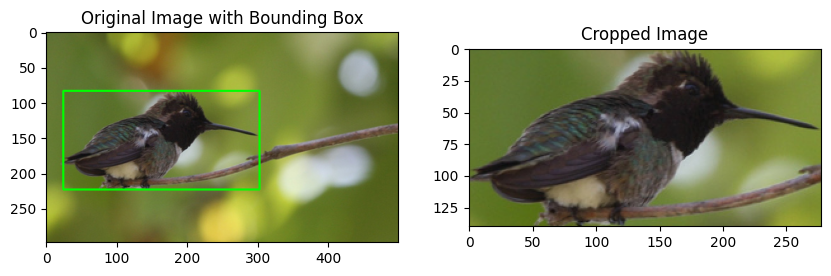

 50%|████▉     | 2992/5994 [00:06<00:07, 376.03it/s]

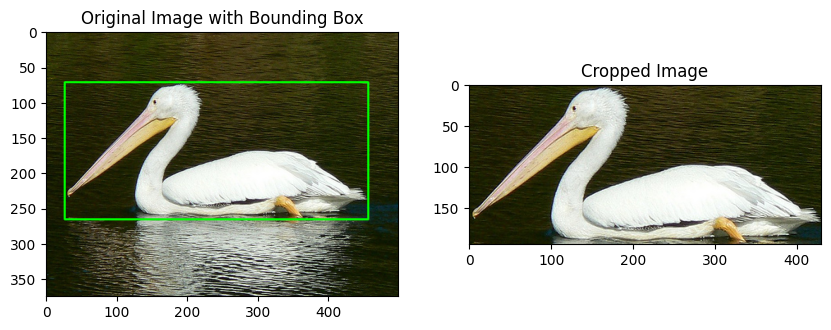

 66%|██████▋   | 3984/5994 [00:08<00:04, 481.63it/s]

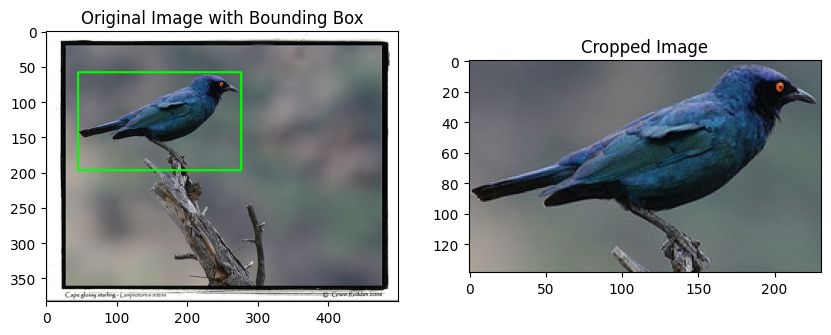

 83%|████████▎ | 4952/5994 [00:10<00:02, 517.15it/s]

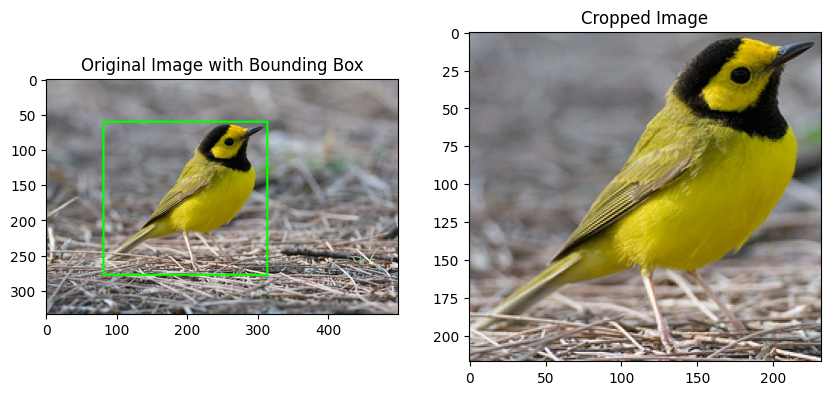

  0%|          | 0/1159 [00:00<?, ?it/s]

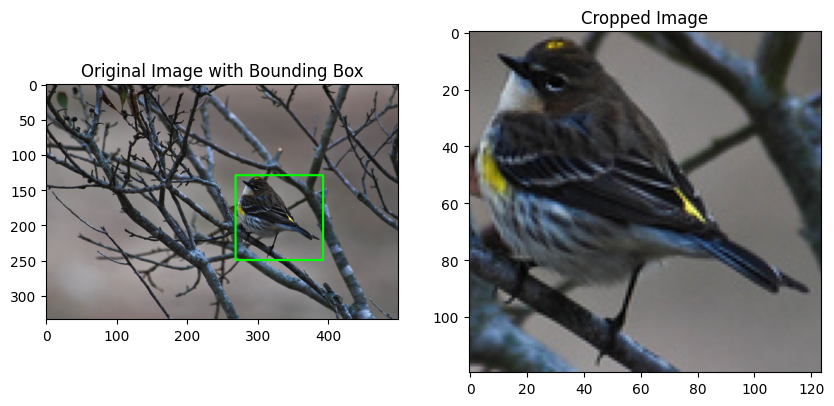

 84%|████████▍ | 971/1159 [00:02<00:00, 486.34it/s]

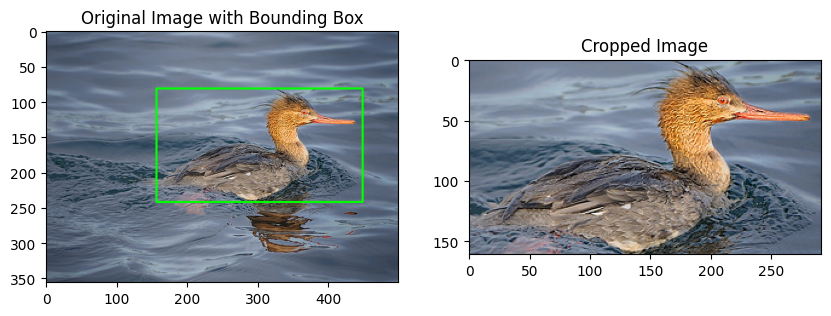

  0%|          | 0/4635 [00:00<?, ?it/s]

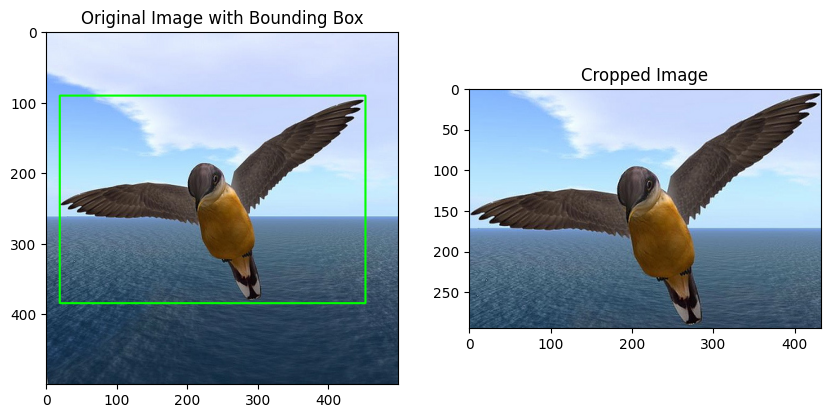

 21%|██▏       | 985/4635 [00:02<00:08, 440.66it/s]

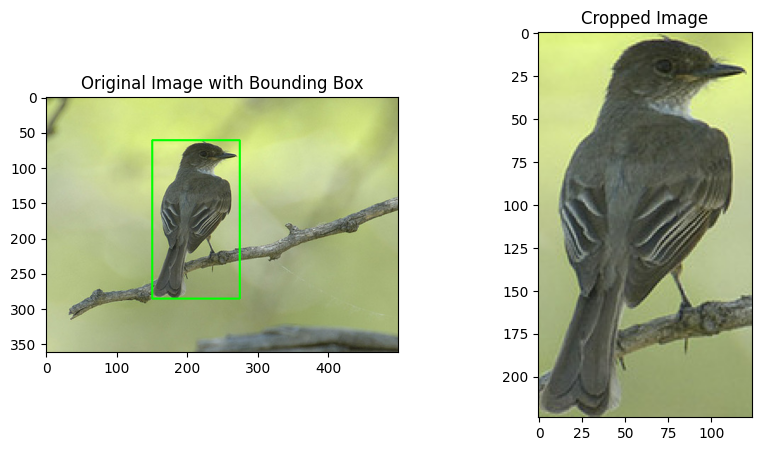

 42%|████▏     | 1955/4635 [00:04<00:05, 480.14it/s]

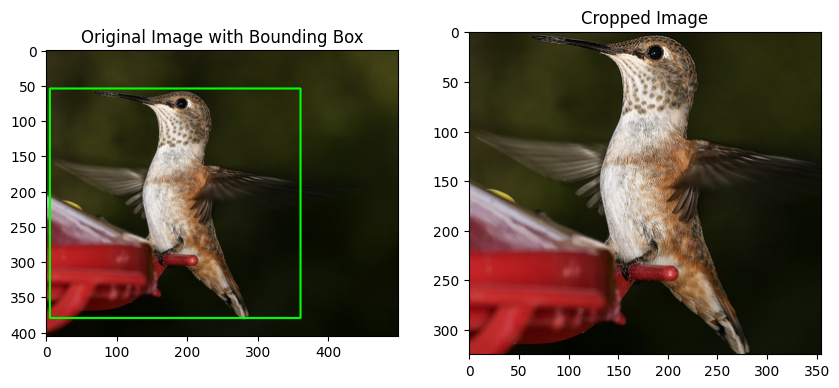

 65%|██████▍   | 2991/4635 [00:06<00:03, 497.91it/s]

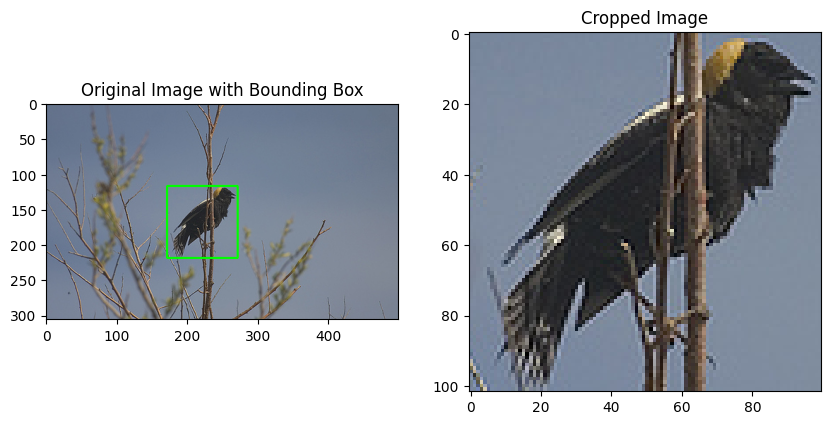

 86%|████████▌ | 3968/4635 [00:09<00:01, 483.67it/s]

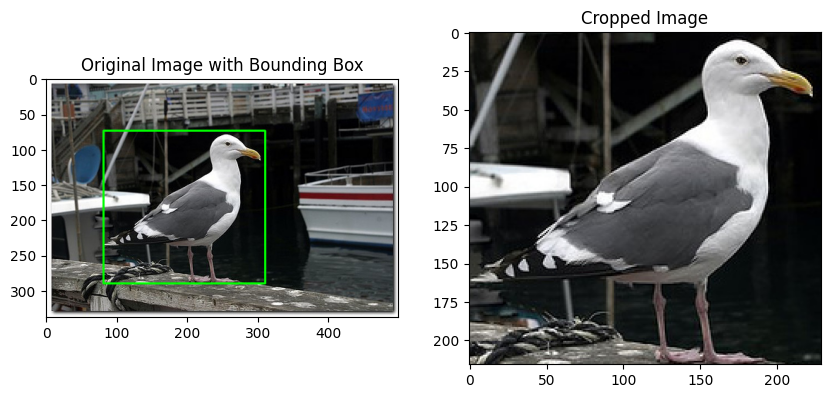

100%|██████████| 4635/4635 [00:10<00:00, 433.33it/s]


In [20]:
process_images(train_data)
process_images(test_data)
process_images(validation_data)

In [21]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    zoom_range=0.2  # Randomly zoom image 
)

# Load and preprocess images for training dataset
train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=os.path.join(dataset_dir, 'cropped_images'),
    x_col='filename',
    y_col='class_id',
    target_size=(299, 299),
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

# For validation and test data, we should not apply augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load and preprocess images for validation dataset
valid_generator = datagen.flow_from_dataframe(
    dataframe=validation_data,
    directory=os.path.join(dataset_dir, 'cropped_images'),
    x_col='filename',
    y_col='class_id',
    target_size=(299, 299),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# Load and preprocess images for test dataset
test_generator = datagen.flow_from_dataframe(
    dataframe=test_data,
    directory=os.path.join(dataset_dir, 'cropped_images'),
    x_col='filename',
    y_col='class_id',
    target_size=(299, 299),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 5994 validated image filenames belonging to 200 classes.
Found 4635 validated image filenames belonging to 200 classes.
Found 1159 validated image filenames belonging to 200 classes.


In [22]:
# Get the first batch of data
images_batch, labels_batch = next(train_generator)

# Print the shapes of the image and label batches
print("Images batch shape:", images_batch.shape)
print("Labels batch shape:", labels_batch.shape)

Images batch shape: (64, 299, 299, 3)
Labels batch shape: (64, 200)


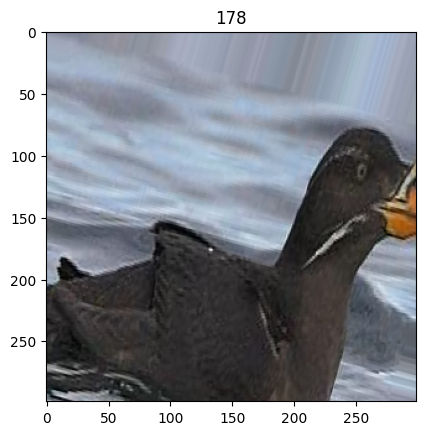

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Get the first batch of data
images_batch, labels_batch = next(train_generator)

# Get the first label
first_label = labels_batch[0]
# Get the class of the first label
first_label_class = np.argmax(first_label)

# Get the first image
first_image = images_batch[0]

# Print the first image
plt.imshow(first_image)
plt.title(first_label_class)
plt.show()

In [24]:
import math

# get variables for training and validation steps
steps_per_epoch = math.ceil(train_generator.samples / train_generator.batch_size)
validation_steps = math.ceil(test_generator.samples / test_generator.batch_size)
test_steps = math.ceil(test_generator.samples / test_generator.batch_size)

# Number of classes
num_classes = len(class_names_df)

# Number of training and test samples
num_train_samples = len(train_data)
num_test_samples = len(test_data)
num_validation_samples = len(validation_data)

In [25]:
# Create datasets
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 299, 299, 3], [None, num_classes])
)

valid_dataset = tf.data.Dataset.from_generator(
    lambda: valid_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 299, 299, 3], [None, num_classes])
)

test_dataset = tf.data.Dataset.from_generator(
    lambda: test_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 299, 299, 3], [None, num_classes])
)

# Optionally, prefetch and cache datasets for better performance
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
valid_dataset = valid_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


2024-05-15 14:54:36.016677: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-05-15 14:54:36.016700: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-15 14:54:36.016702: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-15 14:54:36.016719: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-15 14:54:36.016730: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2024-05-15 14:54:37.009255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


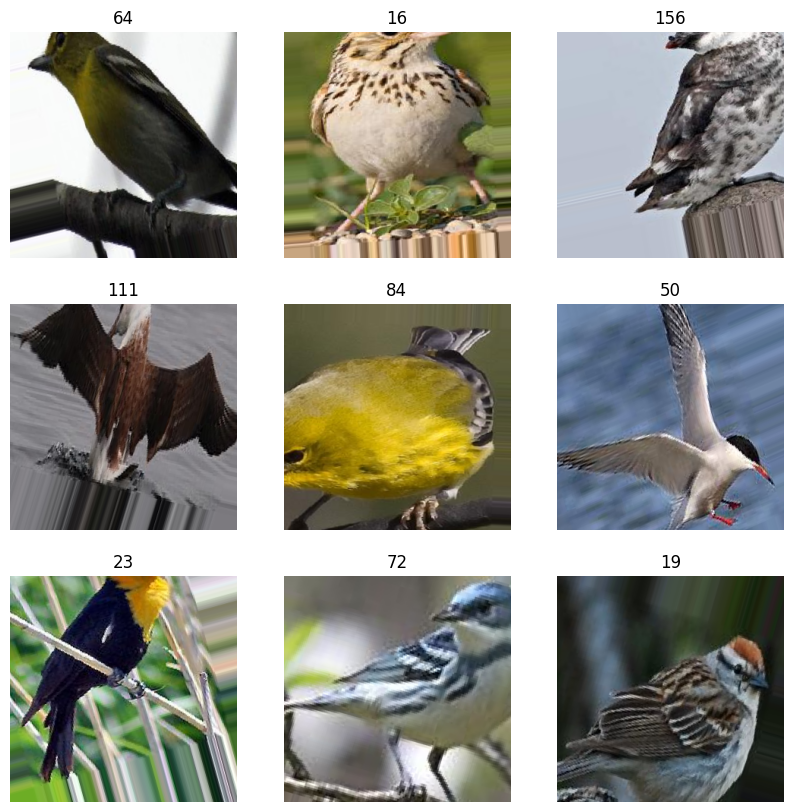

In [26]:
import matplotlib.pyplot as plt

for images, labels in train_dataset.take(1):  # Only take first 5 elements for example
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(np.argmax(labels[i]))        
        plt.axis("off")

In [27]:
# Assuming train_dataset is a tf.data.Dataset
for features, label in train_dataset.take(1):
    first_features = features

# Print the first features
print(first_features.shape, label.shape)

(64, 299, 299, 3) (64, 200)


2024-05-15 14:54:38.354020: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [28]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(299, 299, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(200, activation='softmax')
])

# Use a learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=94,
    decay_rate=0.9)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3,
    restore_best_weights=True)

history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_dataset,
    validation_steps=validation_steps,
    epochs=5,
    callbacks=[early_stopping]
)

test_loss, test_acc = model.evaluate(test_dataset, steps=test_steps)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


Epoch 1/5


/Users/matthewdulcich/Documents/DevProjects/Machine Learning Projects/Image-Classification-Transfer-Learning/python-venv311/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-15 14:54:38.799553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


94/94 ━━━━━━━━━━━━━━━━━━━━ 77s 800ms/step - accuracy: 0.0033 - loss: 6.5821 - val_accuracy: 0.0058 - val_loss: 5.5250
Epoch 2/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 74s 781ms/step - accuracy: 0.0042 - loss: 5.4691 - val_accuracy: 0.0058 - val_loss: 5.3702
Epoch 3/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 76s 811ms/step - accuracy: 0.0029 - loss: 5.3570 - val_accuracy: 0.0025 - val_loss: 5.3288
Epoch 4/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 73s 778ms/step - accuracy: 0.0039 - loss: 5.3242 - val_accuracy: 0.0085 - val_loss: 5.3131
Epoch 5/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 73s 777ms/step - accuracy: 0.0033 - loss: 5.3115 - val_accuracy: 0.0025 - val_loss: 5.3064
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 316ms/step - accuracy: 0.0032 - loss: 5.3063
Test Loss: 5.306436061859131
Test Accuracy: 0.005176876671612263


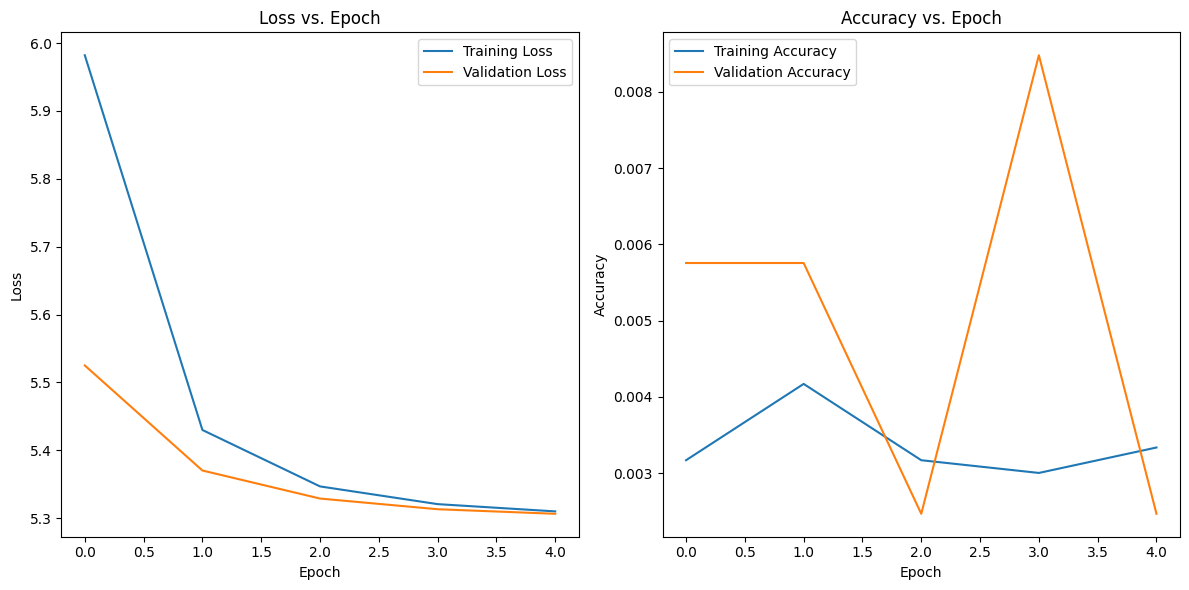

In [29]:
import matplotlib.pyplot as plt

# Get the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()

plt.tight_layout()
plt.show()


In [34]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

# Load the pre-trained InceptionV3 model, excluding the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add your custom layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(200, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Use a learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=94,
    decay_rate=0.9)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3,
    restore_best_weights=True)

history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_dataset,
    validation_steps=validation_steps,
    epochs=50,
    callbacks=[early_stopping]
)

test_loss, test_acc = model.evaluate(test_dataset, steps=test_steps)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 72s 660ms/step - accuracy: 0.0095 - loss: 5.4932 - val_accuracy: 0.0658 - val_loss: 5.0023
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 53s 563ms/step - accuracy: 0.0445 - loss: 4.9731 - val_accuracy: 0.1433 - val_loss: 4.3049
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 49s 519ms/step - accuracy: 0.0776 - loss: 4.4544 - val_accuracy: 0.2179 - val_loss: 3.8128
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 46s 485ms/step - accuracy: 0.1064 - loss: 4.1253 - val_accuracy: 0.2566 - val_loss: 3.5113
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 481ms/step - accuracy: 0.1353 - loss: 3.8851 - val_accuracy: 0.3215 - val_loss: 3.2665
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 47s 496ms/step - accuracy: 0.1466 - loss: 3.7454 - val_accuracy: 0.3121 - val_loss: 3.1906
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 46s 486ms/step - accuracy: 0.1536 - loss: 3.5861 - val_accuracy: 0.3388 - val_loss: 3.0599
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 46s 488ms/step - accuracy: 0.1685 - loss: 3.5291 - val_accu

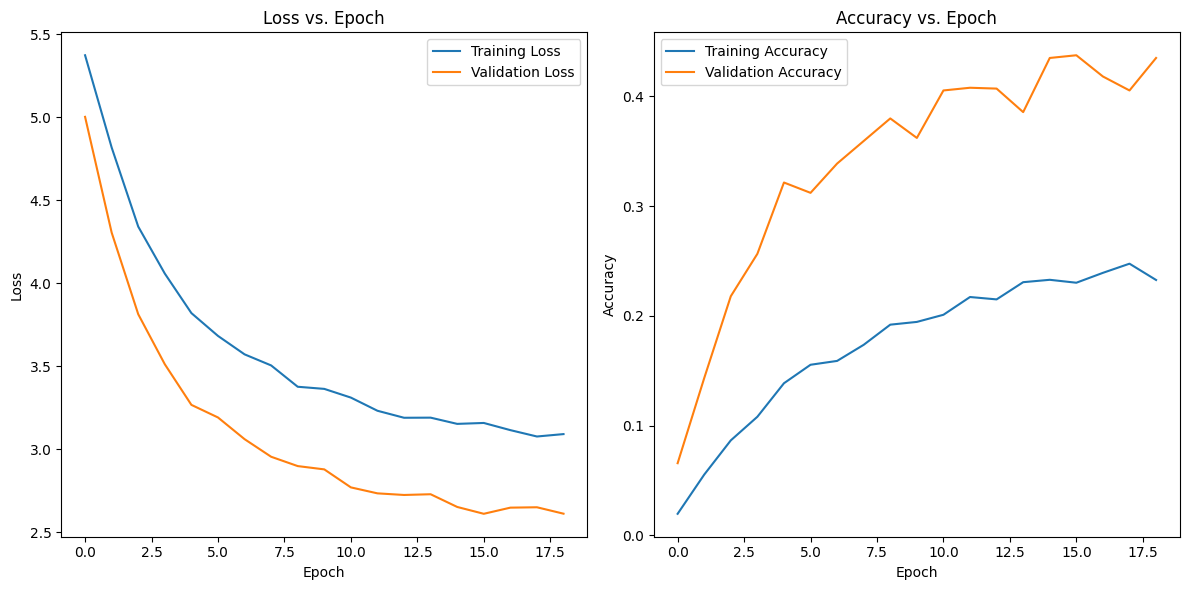

In [35]:
import matplotlib.pyplot as plt

# Get the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()

plt.tight_layout()
plt.show()


In [36]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

# Load the pre-trained InceptionV3 model, excluding the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add your custom layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(200, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Use a learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=94,
    decay_rate=0.9)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3,
    restore_best_weights=True)

history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_dataset,
    validation_steps=validation_steps,
    epochs=50,
    callbacks=[early_stopping]
)

# Unfreeze all layers of the base model for fine-tuning
for layer in base_model.layers:
    layer.trainable = True

# Compile the model with a lower learning rate
optimizer_fine_tuning = tf.keras.optimizers.Adam(learning_rate=1e-5)  # Smaller learning rate for fine-tuning

model.compile(optimizer=optimizer_fine_tuning,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Continue training for a few more epochs
history_fine_tuning = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_dataset,
    validation_steps=validation_steps,
    epochs=10,  # Adjust the number of epochs as needed
    callbacks=[early_stopping]
)

test_loss, test_acc = model.evaluate(test_dataset, steps=test_steps)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 85s 749ms/step - accuracy: 0.0094 - loss: 5.5183 - val_accuracy: 0.0641 - val_loss: 5.1095
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 56s 602ms/step - accuracy: 0.0300 - loss: 5.0574 - val_accuracy: 0.1179 - val_loss: 4.4326
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 50s 534ms/step - accuracy: 0.0688 - loss: 4.5490 - val_accuracy: 0.1817 - val_loss: 3.9229
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 47s 501ms/step - accuracy: 0.0879 - loss: 4.1973 - val_accuracy: 0.2327 - val_loss: 3.5874
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 47s 503ms/step - accuracy: 0.1108 - loss: 3.9535 - val_accuracy: 0.2763 - val_loss: 3.4071
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 48s 508ms/step - accuracy: 0.1306 - loss: 3.8131 - val_accuracy: 0.3028 - val_loss: 3.2383
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 47s 497ms/step - accuracy: 0.1473 - loss: 3.6881 - val_accuracy: 0.3084 - val_loss: 3.1751
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 46s 492ms/step - accuracy: 0.1543 - loss: 3.6099 - val_accu

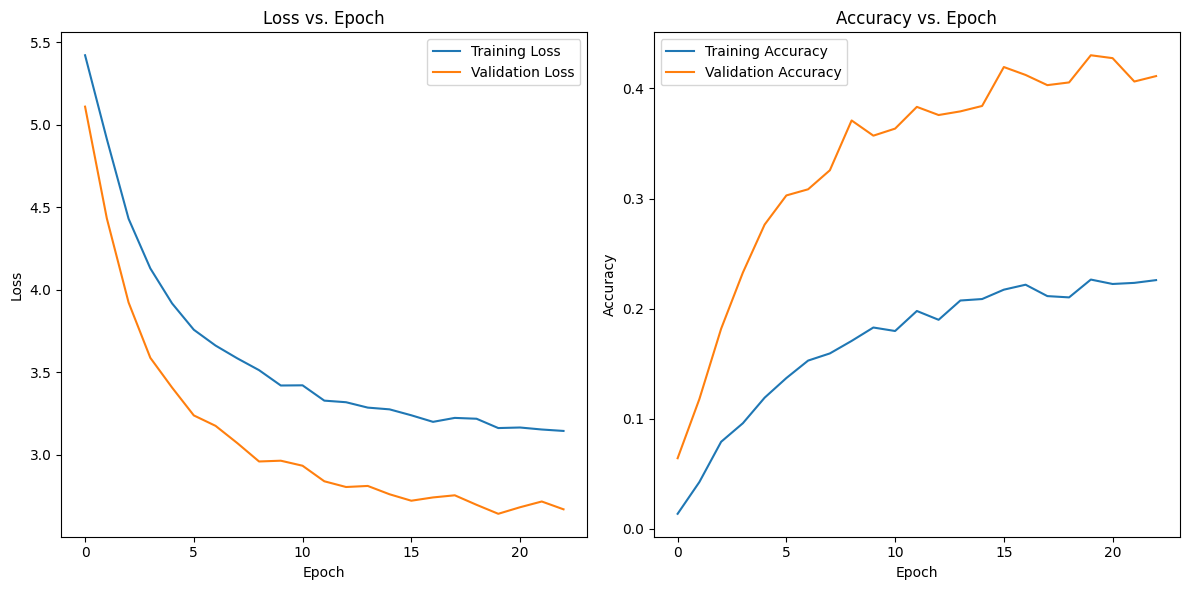

In [37]:
import matplotlib.pyplot as plt

# Get the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()

plt.tight_layout()
plt.show()


In [38]:
# Print the architecture of the base model
print("Base model architecture:")
base_model.summary()

# Print the architecture of the entire model
print("\nEntire model architecture:")
model.summary()

Base model architecture:


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_285 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_285[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_282      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_286 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_282[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_286[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_283      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_287 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_283[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_287[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_284      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 73, 73,    │          0 │ activation_284[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_288 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_14… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_288[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_285      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_289 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_285[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_289[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_286      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)


Entire model architecture:


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_285 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_285[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_282      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_286 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_282[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_286[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_283      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_287 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_283[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_287[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_284      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 73, 73,    │          0 │ activation_284[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_288 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_14… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_288[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_285      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_289 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_285[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_289[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_286      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 66,203,706 (252.55 MB)

 Trainable params: 22,056,424 (84.14 MB)

 Non-trainable params: 34,432 (134.50 KB)

 Optimizer params: 44,112,850 (168.28 MB)

In [40]:
# Save model weights
model.save_weights('model_weights.weights.h5')

In [41]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

# Load the pre-trained InceptionV3 model, excluding the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Add your custom layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(200, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Load the weights
model.load_weights('model_weights.weights.h5')

In [42]:
# Assume that `input_data` is your new data for which you want to make predictions
# The data should be preprocessed in the same way as the training data
predictions = model.predict(test_dataset, steps=test_steps)

import numpy as np

# Get the class with the highest probability for each input sample
predicted_classes = np.argmax(predictions, axis=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step


In [43]:
print(predicted_classes)

[ 43  29  51 ...  93  78 160]
